In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [50]:
# Load the CSV file
file_path = 'odi.csv'
odi_data = pd.read_csv(file_path)

In [51]:
# Handle missing values (if any)
odi_data.dropna(inplace=True)

In [52]:
# Encode categorical variables
labelencoder = LabelEncoder()
odi_data['bat_team'] = labelencoder.fit_transform(odi_data['bat_team'])
odi_data['bowl_team'] = labelencoder.fit_transform(odi_data['bowl_team'])
odi_data['venue'] = labelencoder.fit_transform(odi_data['venue'])
odi_data['batsman'] = labelencoder.fit_transform(odi_data['batsman'])
odi_data['bowler'] = labelencoder.fit_transform(odi_data['bowler'])

In [53]:
# Select relevant features
features = ['bat_team', 'bowl_team', 'venue', 'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5']
X = odi_data[features]
y = odi_data['total']

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Build the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Predict on the test set
y_pred = model.predict(X_test)

In [57]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE manually since root_mean_squared_error function is not available in this environment

In [58]:
# Combine actual and predicted scores
predictions = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
predictions.head(20)  # Display the first 20 predictions

,Actual Score,Predicted Score
228112,316,314.466686
240502,332,312.114425
183695,253,255.648042
316939,307,288.065640
187047,199,233.254674
129585,294,311.926358
108922,246,228.391291
278872,210,229.422387
83577,290,292.103409
243945,186,193.142827


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Summary statistics
summary_stats = odi_data.describe()

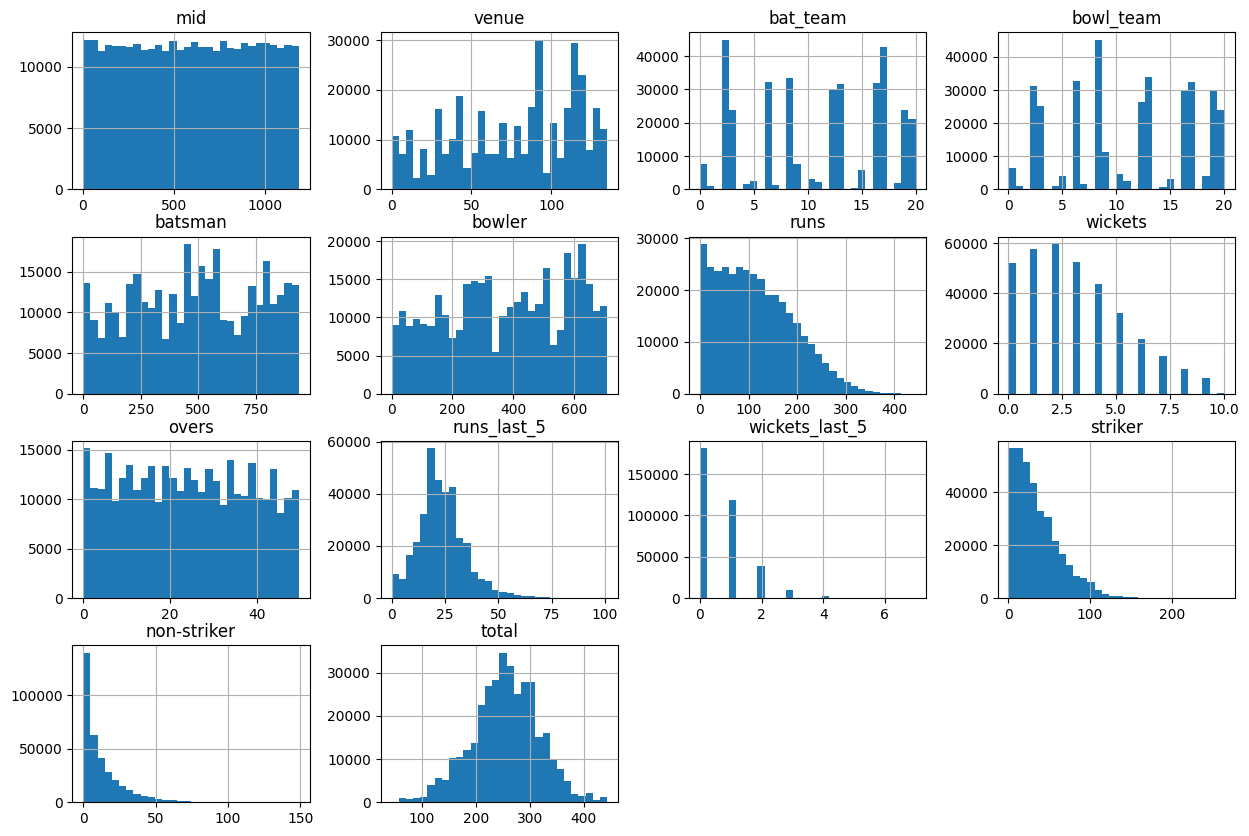

In [61]:
# Histograms
odi_data.hist(bins=30, figsize=(15, 10))
plt.show()

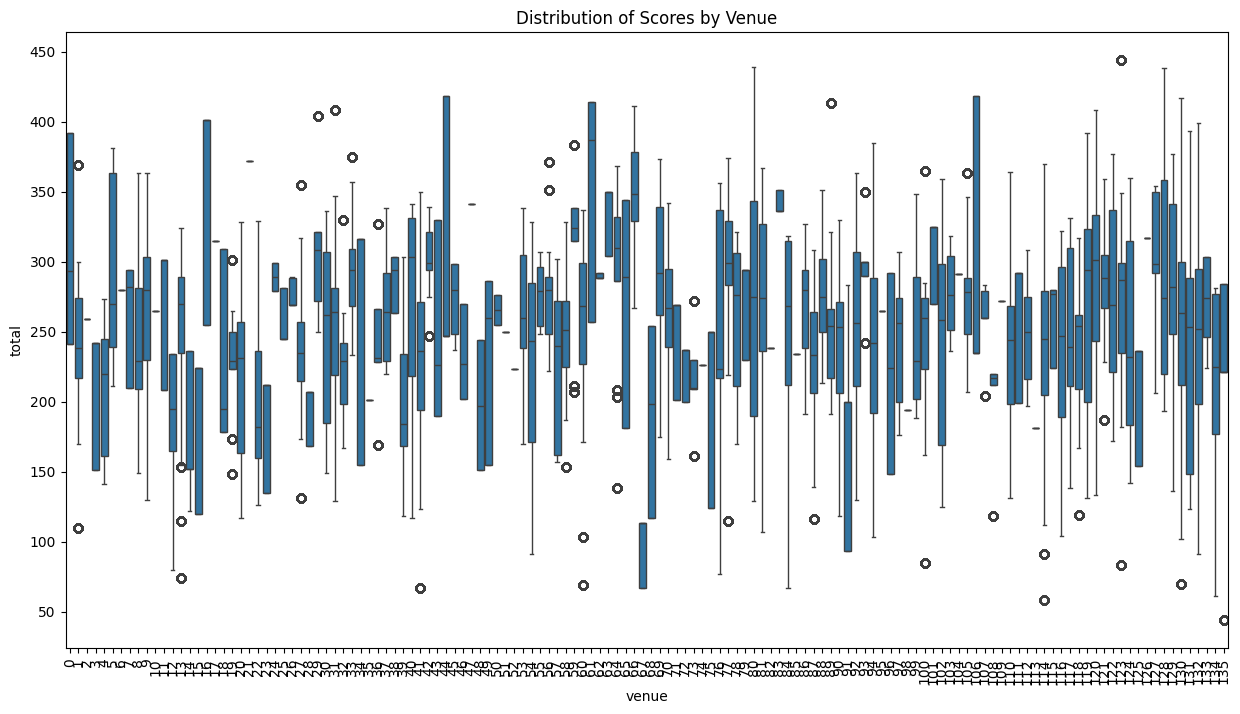

In [64]:
# Box plot of scores by venue
plt.figure(figsize=(15, 8))
sns.boxplot(x='venue', y='total', data=odi_data)
plt.xticks(rotation=90)
plt.title('Distribution of Scores by Venue')
plt.show()

In [63]:
summary_stats

,mid,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000,350899.000000
mean,594.360426,76.364840,10.805565,11.018404,484.711971,377.121425,114.801661,2.974970,24.052899,23.548303,0.669814,35.180129,12.427944,255.355387
std,343.605128,38.566541,6.186962,6.015480,267.337158,202.316433,77.665959,2.298959,14.235439,11.042974,0.833895,28.115264,15.019181,62.354412
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
25%,296.000000,41.000000,6.000000,6.000000,253.000000,213.000000,51.000000,1.000000,11.600000,17.000000,0.000000,13.000000,2.000000,217.000000
50%,596.000000,84.000000,12.000000,12.000000,495.000000,385.000000,105.000000,3.000000,23.600000,23.000000,0.000000,29.000000,7.000000,257.000000
75%,893.000000,114.000000,17.000000,17.000000,724.000000,570.000000,168.000000,4.000000,36.200000,29.000000,1.000000,50.000000,18.000000,298.000000
max,1188.000000,135.000000,20.000000,20.000000,937.000000,708.000000,444.000000,10.000000,49.600000,101.000000,7.000000,264.000000,149.000000,444.000000


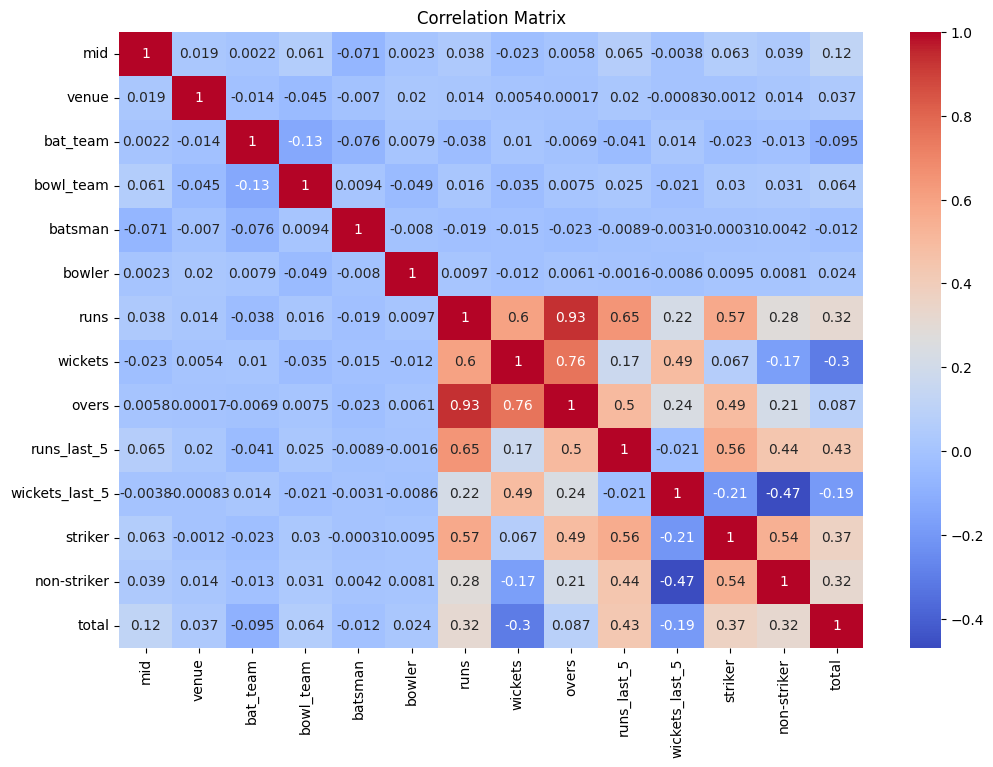

In [33]:
# Select only numeric columns for correlation matrix
numeric_cols = odi_data.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


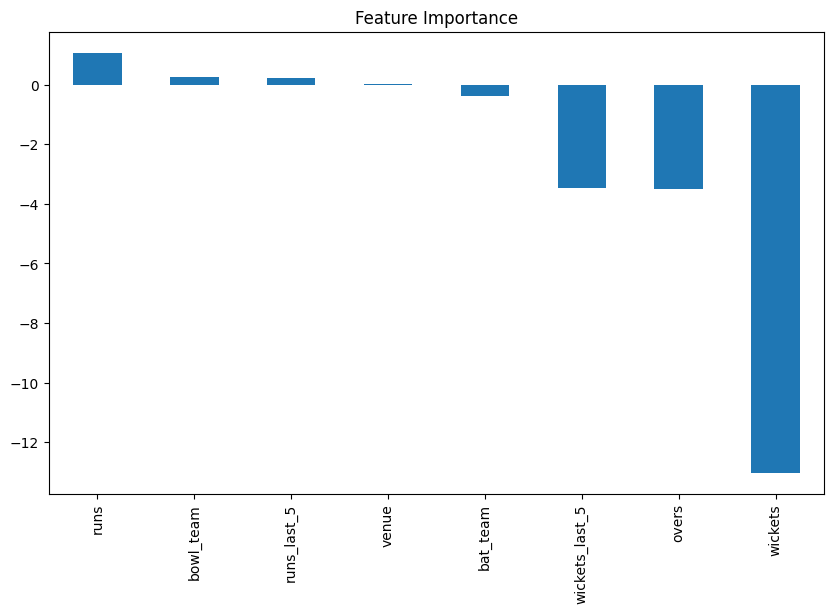

runs               1.068870
bowl_team          0.251373
runs_last_5        0.215774
venue              0.032072
bat_team          -0.397385
wickets_last_5    -3.482483
overs             -3.497064
wickets          -13.024087
dtype: float64

In [32]:
import numpy as np

# Get feature importances
coefficients = model.coef_
feature_importance = pd.Series(coefficients, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

feature_importance


In [ ]:
# Conclusion: 
# I have conducted a simple data analysis along with evaluating a regression model for score prediction in cricket matches.
# The contents of data set is given in the README.md file of my github profile.
# github link: 